In [1]:
#pip install chess
import chess
import math
import time
import chess.svg
import time
from IPython.display import display, HTML, clear_output

In [2]:
def who(player):
    return "White" if player == chess.WHITE else "Black"
def display_board(board, use_svg):
    if use_svg:
        return board._repr_svg_()
    else:
        return "<pre>" + str(board) + "</pre>" 

In [3]:
def play_game(player1, player2, board, visual="svg", pause=0.5):
    """
    playerN1, player2: functions that takes board, return uci move
    visual: "simple" | "svg" | None
    """
    use_svg = (visual == "svg")
    #board = chess.Board()
    try:
        while not board.is_game_over(claim_draw=True):
            if board.turn == chess.WHITE:
                uci = player1(board)
            else:
                uci = player2(board)               
            name = who(board.turn)
            board.push_uci(uci)
            board_stop = display_board(board, use_svg)
            html = "<b>Move %s %s, Play '%s':</b><br/>%s" % (
                       len(board.move_stack), name, uci, board_stop)
            if visual is not None:
                if visual == "svg":
                    clear_output(wait=True)
                display(HTML(html))
                if visual == "svg":
                    time.sleep(pause)
    except KeyboardInterrupt:
        msg = "Game interrupted!"
        return (None, msg, board)
    result = None
    if board.is_checkmate():
        msg = "checkmate: " + who(not board.turn) + " wins!"
        result = not board.turn
    elif board.is_stalemate():
        msg = "draw: stalemate"
    elif board.is_fivefold_repetition():
        msg = "draw: 5-fold repetition"
    elif board.is_insufficient_material():
        msg = "draw: insufficient material"
    elif board.can_claim_draw():
        msg = "draw: claim"
    if visual is not None:
        print(msg)
    return (result, msg, board)

In [4]:
import random
def random_player(board):
    move = random.choice(list(board.legal_moves))
    return move.uci()
def basic_heuristic_player(board):
    moves = list(board.legal_moves)
    for move in moves:
        newboard = board.copy()
        # go through board and return a score
        move.score = heuristic_staticAnalysis(newboard, move, board.turn)
    moves.sort(key=lambda move: move.score, reverse=True) # sort on score
    return moves[0].uci()

In [5]:
import heuristics
def get_heuristic(board):
    scores = 0
    scores += heuristics.materials(board,100)
    scores += heuristics.piece_moves(board,1)
    scores += heuristics.in_check(board,5)
    scores += heuristics.piece_score(board,10)
    return scores

In [6]:
def compMove_prune(board):
    possible_moves = list(board.legal_moves)
    alpha = -9999
    beta = 9999
    bestScore = -9999
    best_move = possible_moves[0]
    for move in possible_moves:
        newboard = board.copy()
        newboard.push(move)
        score = ab_minimax(newboard,alpha,beta,1,False)
        newboard = board.copy()
        if score > bestScore:
            bestScore = score
            bestMove = move
            
    return bestMove.uci()

In [7]:
def ab_minimax(board,alpha,beta,depth,isMaximizing):
    max_depth=3
    moves = list(board.legal_moves)
    if board.is_checkmate():
        if board.turn: ##it is white turn
            return -9999
        else:
            return 9999
    if depth == max_depth:
        return get_heuristic(board)
    if isMaximizing:
        best_score = -9999
        for move in moves:
            newboard = board.copy()
            newboard.push(move)
            score = ab_minimax(newboard,alpha,beta,depth+1, False)
            newboard = board.copy()
            alpha = max(alpha,best_score)
            best_score = max(best_score, score)
            if beta <= alpha:
                return best_score
        return best_score
    else:
        best_score = 9999
        for move in moves:
            newboard = board.copy()
            newboard.push(move)
            score = ab_minimax(newboard,alpha,beta,depth+1, True)
            newboard = board.copy()
            beta = min(beta,best_score)
            best_score = min(best_score, score)
            if beta <= alpha:
                return best_score
        return best_score

In [8]:
#PRINt TREE VERSION

#comp move uses minimax algorithm (chess one)
def compMove(board):
    moves = list(board.legal_moves)
    bestScore = -math.inf
    bestMove = 0
    
    #keep track of number of first tree nodes
    comp_count = 1
    
    for move in moves:
        newboard = board.copy()
        newboard.push(move)
        comp_count +=1
        score = minimax(newboard, 2, False)
        newboard = board.copy()
        if (score > bestScore):
            bestScore = score
            bestMove = move            
    return bestMove.uci()

#defines minimax algorithm
def minimax(board, depth, isMaximizing):
    maxDepth = 3
    moves = list(board.legal_moves)

    if chess.Board.is_checkmate(board) == True:
        #print('CHECKMATE FOUND')
        return 1
    #elif (checkWhichMarkWon(player)):
        #return -1
    elif chess.Board.is_stalemate(board) == True:
        #print('STALEMATE FOUND')
        return -1
    elif board.can_claim_draw():
        return -1
    elif board.is_fivefold_repetition():
        return -1
    elif depth > maxDepth:
        return -1

    if (isMaximizing):
        bestScore = -math.inf
        for move in moves:
            newboard = board.copy()
            newboard.push(move)
            
            #to visualise move tree
            #print('maximising below comp node', 'depth:', depth, ', trial board move:')
            #print(newboard)
            score = minimax(newboard, depth + 1, False)     
            newboard = board.copy() #remove move

            if (score > bestScore):
                bestScore = score

        return bestScore
        

    else:
        bestScore = math.inf
        for move in moves:
            newboard = board.copy()
            newboard.push(move)
            
            #to visualise move tree
            #print('minimising below comp node','depth:', depth, ', trial board move:')
            #print(newboard)
            

            score = minimax(newboard, depth + 1, True)

            newboard = board.copy() #remove move
          
            if (score < bestScore):
                bestScore = score
        return bestScore


In [9]:
#currently board 1,4 5 doesnt find checkmate as opponent does not do best move

In [10]:
board1 = chess.Board()
chess.Board.clear(board1)
chess.Board.set_piece_at(board1, chess.H7, chess.Piece.from_symbol('k'))
chess.Board.set_piece_at(board1, chess.G2, chess.Piece.from_symbol('K'))

chess.Board.set_piece_at(board1, chess.H1, chess.Piece.from_symbol('Q'))
chess.Board.set_piece_at(board1, chess.D7, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board1, chess.E4, chess.Piece.from_symbol('N'))
chess.Board.set_piece_at(board1, chess.F7, chess.Piece.from_symbol('P'))
chess.Board.set_piece_at(board1, chess.G5, chess.Piece.from_symbol('P'))



chess.Board.set_piece_at(board1, chess.H6, chess.Piece.from_symbol('n'))
chess.Board.set_piece_at(board1, chess.G7, chess.Piece.from_symbol('r'))
chess.Board.set_piece_at(board1, chess.G6, chess.Piece.from_symbol('p'))

chess.Board.set_piece_at(board1, chess.G4, chess.Piece.from_symbol('p'))
chess.Board.set_piece_at(board1, chess.G3, chess.Piece.from_symbol('p'))


#print('original board:')
board1

play_game(compMove_prune,random_player, board1, visual='svg', pause=0.5)

draw: stalemate


(None, 'draw: stalemate', Board('6R1/5P1k/6pn/6P1/4N1p1/6p1/6K1/7Q b - - 0 2'))

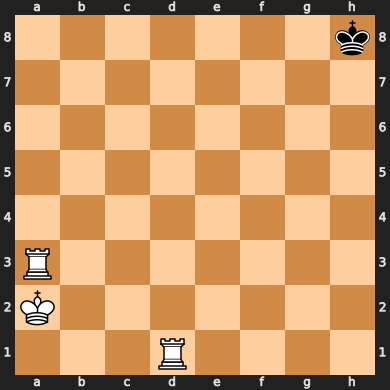

In [11]:
board4 = chess.Board()
chess.Board.clear(board4)
chess.Board.set_piece_at(board4, chess.H8, chess.Piece.from_symbol('k'))
chess.Board.set_piece_at(board4, chess.A2, chess.Piece.from_symbol('K'))


chess.Board.set_piece_at(board4, chess.A3, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board4, chess.D1,chess.Piece.from_symbol('R'))


board4


In [12]:
play_game(compMove_prune,random_player, board4, visual='svg', pause=0.5)

checkmate: White wins!


(True, 'checkmate: White wins!', Board('3R1k2/2R5/8/8/8/8/K7/8 b - - 5 3'))

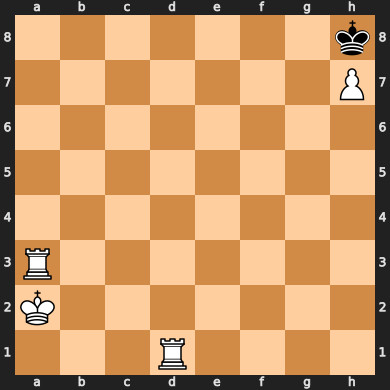

In [13]:
board5 = chess.Board()
chess.Board.clear(board5)
chess.Board.set_piece_at(board5, chess.H8, chess.Piece.from_symbol('k'))
chess.Board.set_piece_at(board5, chess.A2, chess.Piece.from_symbol('K'))


chess.Board.set_piece_at(board5, chess.A3, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board5, chess.D1,chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board5, chess.H7,chess.Piece.from_symbol('P'))


board5


In [14]:
board5.is_stalemate()

False

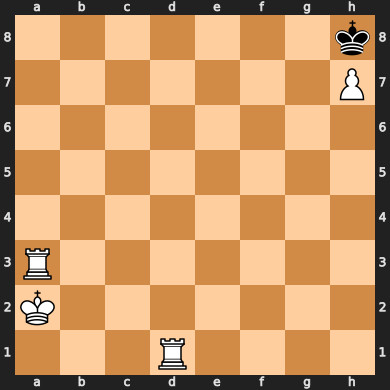

In [15]:
board5

In [16]:
board5.turn

True

In [17]:
len(list(board5.legal_moves))

30

In [18]:
board5.find_move()

TypeError: find_move() missing 2 required positional arguments: 'from_square' and 'to_square'

In [19]:
#play_game(compMove, compMove_escape, board5, visual='svg', pause=3)

In [20]:
play_game(compMove_prune, compMove,board5, visual='svg', pause=3)

draw: stalemate


(None, 'draw: stalemate', Board('7k/R6P/8/8/8/8/K7/3R4 b - - 1 1'))

original board:


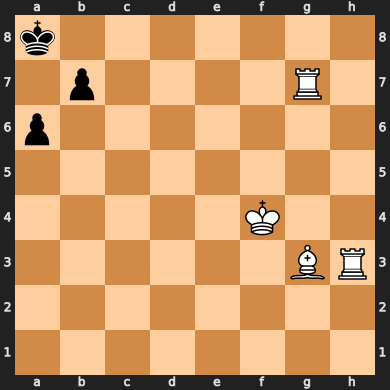

In [21]:
board3 = chess.Board()
chess.Board.clear(board3)
chess.Board.set_piece_at(board3, chess.F4, chess.Piece.from_symbol('K'))
chess.Board.set_piece_at(board3, chess.A8, chess.Piece.from_symbol('k'))



chess.Board.set_piece_at(board3, chess.H3, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board3, chess.G3, chess.Piece.from_symbol('B'))
chess.Board.set_piece_at(board3, chess.G7, chess.Piece.from_symbol('R'))



chess.Board.set_piece_at(board3, chess.A6, chess.Piece.from_symbol('p'))
chess.Board.set_piece_at(board3, chess.B7, chess.Piece.from_symbol('p'))


print('original board:')
board3


#

In [22]:
play_game(compMove_prune, random_player, board3, visual='svg', pause=1)

checkmate: White wins!


(True, 'checkmate: White wins!', Board('7R/kp4R1/p7/8/5K2/8/5B2/8 b - - 3 2'))

In [23]:
board2 = chess.Board()
chess.Board.clear(board2)
chess.Board.set_piece_at(board2, chess.F4, chess.Piece.from_symbol('K'))
chess.Board.set_piece_at(board2, chess.A8, chess.Piece.from_symbol('k'))

chess.Board.set_piece_at(board2, chess.A4, chess.Piece.from_symbol('N'))
chess.Board.set_piece_at(board2, chess.E5, chess.Piece.from_symbol('B'))
chess.Board.set_piece_at(board2, chess.H3, chess.Piece.from_symbol('R'))



chess.Board.set_piece_at(board2, chess.A7, chess.Piece.from_symbol('r'))
chess.Board.set_piece_at(board2, chess.B7, chess.Piece.from_symbol('p'))
chess.Board.set_piece_at(board2, chess.D6, chess.Piece.from_symbol('b'))


board2

play_game(compMove_prune, random_player, board2, visual='svg', pause=1)

checkmate: White wins!


(True, 'checkmate: White wins!', Board('1k6/rp6/1N1B4/8/5K2/7R/8/8 b - - 0 2'))

In [24]:
board2 = chess.Board()
chess.Board.clear(board2)
chess.Board.set_piece_at(board2, chess.F4, chess.Piece.from_symbol('K'))
chess.Board.set_piece_at(board2, chess.A8, chess.Piece.from_symbol('k'))

chess.Board.set_piece_at(board2, chess.A4, chess.Piece.from_symbol('N'))
chess.Board.set_piece_at(board2, chess.E5, chess.Piece.from_symbol('B'))
chess.Board.set_piece_at(board2, chess.H3, chess.Piece.from_symbol('R'))



chess.Board.set_piece_at(board2, chess.A7, chess.Piece.from_symbol('r'))
chess.Board.set_piece_at(board2, chess.B7, chess.Piece.from_symbol('p'))
chess.Board.set_piece_at(board2, chess.D6, chess.Piece.from_symbol('b'))


board2
play_game(compMove_prune, random_player, board2, visual='svg', pause=1)

checkmate: White wins!


(True, 'checkmate: White wins!', Board('1k6/rp6/1N1B4/8/5K2/7R/8/8 b - - 0 2'))

In [29]:
board1 = chess.Board()

import chess.svg



In [30]:
play_game(compMove_prune, random_player, board1, visual='svg', pause=0.1)

checkmate: White wins!


(True,
 'checkmate: White wins!',
 Board('2bk3r/1p1pQp1p/p1pB3b/6p1/2B5/2N2N2/PPP2PPP/R4RK1 b - - 0 13'))

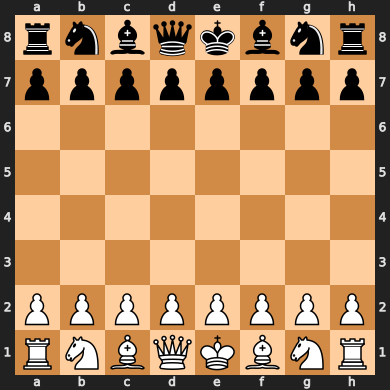

In [28]:
board1 = chess.Board()

import chess.svg

board1